# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

In [15]:
# cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

# try:
#    del X_train, y_train
#    del X_test, y_test
#    print('Clear previously loaded data.')
# except:
#    pass

# X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# print('Training data shape: ', X_train.shape)
# print('Training labels shape: ', y_train.shape)
# print('Test data shape: ', X_test.shape)
# print('Test labels shape: ', y_test.shape)

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



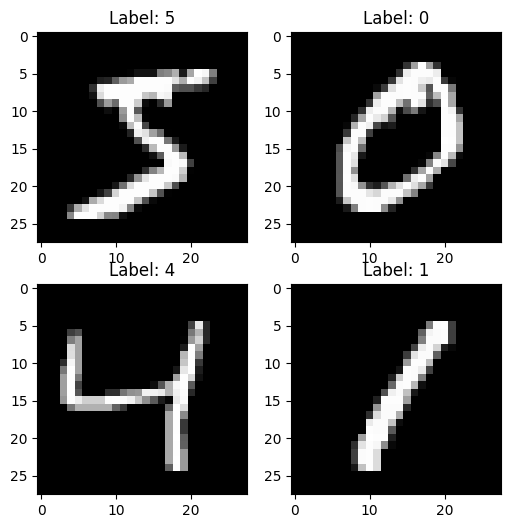

In [3]:
plt.figure(figsize=[6,6])
for fold in range(4):
    plt.subplot(2,2,fold+1)
    plt.title("Label: %i"%y_train[fold])
    plt.imshow(X_train[fold].reshape([28,28]),cmap='gray');

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [5]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train[:2000], y_train[:2000])

1.5 Выполните классификацию на тестовой выборке

In [6]:
y_preds = classifier.predict_labels(X_test[:200], k = 3)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


In [7]:
classifier.compute_distances_one_loop(X_test[:200])

array([[113.01953125, 134.97265625, 115.91796875, ..., 173.94140625,
         96.83984375, 218.015625  ],
       [153.07421875, 161.16015625, 165.80078125, ..., 146.12890625,
        128.42578125, 204.3671875 ],
       [105.8515625 , 124.8671875 , 107.109375  , ..., 156.8203125 ,
         81.59375   , 221.67578125],
       ...,
       [109.0703125 , 131.5859375 , 153.6796875 , ..., 152.4375    ,
         99.046875  , 187.96484375],
       [130.078125  , 151.1328125 , 113.109375  , ..., 159.46875   ,
         92.1171875 , 218.66796875],
       [110.53125   , 137.7265625 , 166.9375    , ..., 129.1640625 ,
         81.734375  , 177.20703125]])


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test[:200],y_preds)

0.145

1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [9]:
accuracy = [accuracy_score(y_test[:200],classifier.predict_labels(X_test[:200], k = i)) for i in range(1,300)]

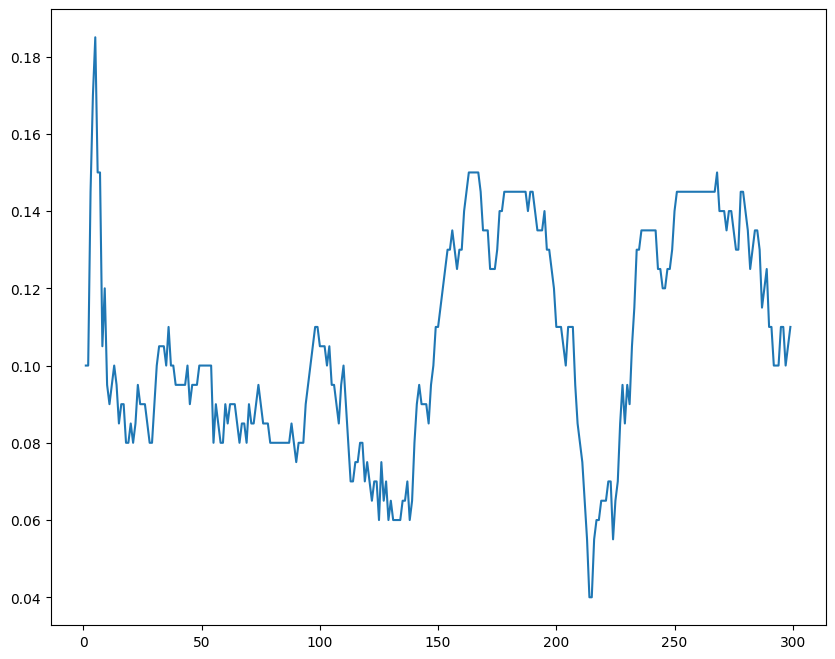

In [10]:
plt.plot(range(1,300),accuracy)

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [11]:
n_splits = 5
X = X_train[:2000]
y = y_train[:2000]
classifier = KNearestNeighbor()
cv_res = []
for k in range(1,300):
    cv_accuracy = 0
    for fold in range(n_splits):
        X_validate = X[int(fold*X.shape[0]/n_splits):int((fold+1)*X.shape[0]/n_splits)]
        X_t = np.concatenate((X[:int(fold*X.shape[0]/n_splits)],X[int((fold+1)*X.shape[0]/n_splits):]))
        y_validate = y[int(fold*y.shape[0]/n_splits):int((fold+1)*y.shape[0]/n_splits)]
        y_t = np.concatenate((y[:int(fold*y.shape[0]/n_splits)],y[int((fold+1)*y.shape[0]/n_splits):]))
        
        classifier.train(X_t, y_t)
        cv_accuracy += accuracy_score(y_validate, classifier.predict_labels(X_validate, k = k))
    cv_res.append((cv_accuracy/n_splits,k))
sorted(cv_res,reverse=True)[0] 

(0.125, 5)


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [12]:
classifier.train(X, y)
y_preds = classifier.predict_labels(X_test[:200], k = sorted(cv_res,reverse=True)[0][1])
accuracy_score(y_test[:200],y_preds)

0.185

1.11 Сделайте выводы по результатам 1 части задания.

Классификатор KNN не эффективен для решения задачи классификации изображений

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
softmax = LinearSVM()
tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))
y_train_pred = softmax.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = softmax.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [15]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(flatten=True)

3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


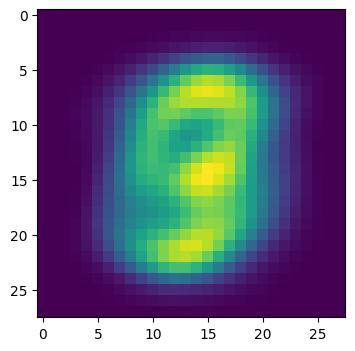

(50000, 785) (10000, 785) (10000, 785)


In [2]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((28,28,1))) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [3]:

from scripts.classifiers.softmax import softmax_loss_naive
from scripts.classifiers.softmax import softmax_loss_vectorized
import time
X_dev, y_dev = X_train[4000:5000], y_train[4000:5000]
# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(785, 10) * 0.0001
loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.302637
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [10]:
X = X_dev
y = y_dev
reg = 0.0
loss = 0.0
dW = np.zeros_like(W)
D, C = W.shape
N = y.shape[0]
loss -= (np.log(np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))).sum() - N * np.linalg.norm(W) * reg
loss /= N
loss
# np.exp(W.T[y[1]].dot(X[1]))

2.302701494683137

In [ ]:
c = 0
dW = X.T.dot(((np.equal(np.full((N,C),np.arange(C)).T,np.full((C,N),y))) - (np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))).T)
dW

In [25]:
c = 2
n = 5
print(((y[n] == c) - np.exp(W.T[c].dot(X[n]))/(np.exp(W.T.dot(X[n]))).sum()))
print(((np.equal(np.full((N,C),np.arange(C)).T,np.full((C,N),y))) - (np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1))))[c,n])

0.8999898211662561
0.8999898211662561


In [26]:
((np.equal(np.full((N,C),np.arange(C)).T,np.full((C,N),y))) - (np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))).shape

(10, 1000)

In [15]:
dW = np.zeros_like(W.T)
for c in range(C):
    dW[c] -= X.T.dot(np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))
dW = dW.T    

In [6]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

print('\n' + '*' * 100 + '\n')

loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0.0)
f = lambda w: softmax_loss_vectorized(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.000538 analytic: 0.000538, relative error: 1.692400e-07


c:\Users\ralph\AI labs\dl_course\DL_Course_SamU\lab_1-2\scripts\gradient_check.py:126: RuntimeWarning: invalid value encountered in scalar divide
  rel_error = (abs(grad_numerical - grad_analytic) /


numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.001268 analytic: 0.001268, relative error: 4.664449e-08
numerical: 0.000036 analytic: 0.000036, relative error: 1.562017e-06
numerical: 0.016156 analytic: 0.016156, relative error: 2.609408e-09
numerical: 0.017105 analytic: 0.017105, relative error: 4.298942e-09
numerical: 0.000000 analytic: 0.000000, relative error: 9.198241e-03
numerical: 0.000027 analytic: 0.000027, relative error: 2.185852e-06
numerical: 0.001072 analytic: 0.001072, relative error: 3.793500e-08
numerical: -0.003620 analytic: -0.003620, relative error: 1.919279e-08

****************************************************************************************************

numerical: -0.007861 analytic: -0.007859, relative error: 1.530609e-04
numerical: 0.013629 analytic: 0.013628, relative error: 6.066123e-05
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: -0.002374 analytic: -0.002373, relative error: 6.685904e-05
numerical: -

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [7]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.302573e+00 computed in 0.267010s
vectorized loss: 2.302573e+00 computed in 0.012990s
Loss difference: 0.000000
Gradient difference: 0.000352


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [10]:
from scripts.classifiers import Softmax
softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(X_train[:5000], y_train[:5000], learning_rate=1e-6, reg=2.5e4,
                      num_iters=300,batch_size=200, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))


iteration 0 / 300: loss 2229.848639
iteration 100 / 300: loss 15.556517
iteration 200 / 300: loss 3.694422
That took 1.284000s


In [11]:
y_train_pred = np.argmax(softmax.predict(X_train[:5000]),axis=-1)
print('training accuracy: %f' % (np.mean(y_train[:5000] == y_train_pred), ))
y_val_pred = np.argmax(softmax.predict(X_val),axis=-1)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.726600
validation accuracy: 0.736700


<AxesSubplot: >

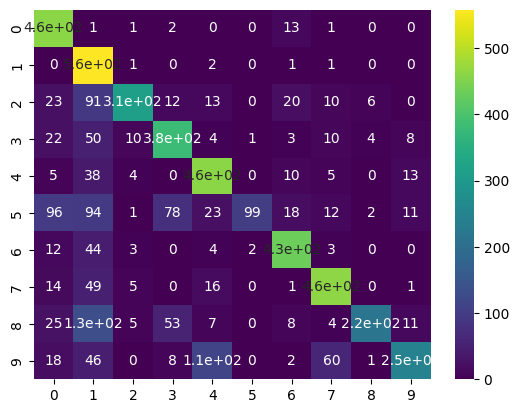

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train[:5000],y_train_pred),cmap = 'viridis', annot=True)

<AxesSubplot: >

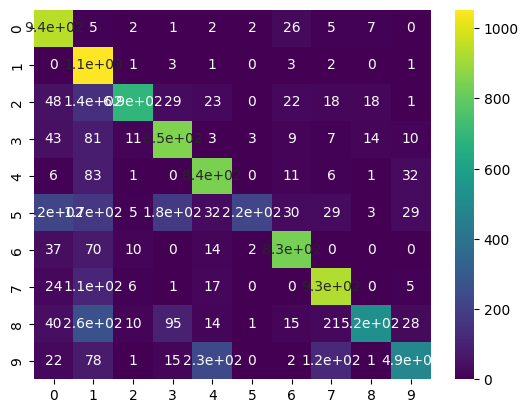

In [13]:
sns.heatmap(confusion_matrix(y_val,y_val_pred),cmap = 'viridis', annot=True)

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [18]:
learning_rates = [1e-7, 1e-6, 5e-5]
regularization_strengths = [2.5e4, 5e4, 1e3, 1e2, 0]

In [19]:
from sklearn.metrics import accuracy_score
n_splits = 5
X = X_train[:5000]
y = y_train[:5000]
classifier = Softmax()
cv_res = []
for lr in learning_rates:
    for reg in regularization_strengths:
        cv_accuracy = 0
        for fold in range(n_splits):
            X_validate = X[int(fold*X.shape[0]/n_splits):int((fold+1)*X.shape[0]/n_splits)]
            X_t = np.concatenate((X[:int(fold*X.shape[0]/n_splits)],X[int((fold+1)*X.shape[0]/n_splits):]))
            y_validate = y[int(fold*y.shape[0]/n_splits):int((fold+1)*y.shape[0]/n_splits)]
            y_t = np.concatenate((y[:int(fold*y.shape[0]/n_splits)],y[int((fold+1)*y.shape[0]/n_splits):]))
            
            classifier.train(X_t, y_t,lr,reg,300,200,False)
            cv_accuracy += accuracy_score(y_validate, np.argmax(classifier.predict(X_validate),axis=-1))
        cv_res.append((cv_accuracy/n_splits,lr,reg))
sorted(cv_res,reverse=True)[0] 

c:\Users\ralph\AI labs\dl_course\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:74: RuntimeWarning: divide by zero encountered in log
  loss -= (np.log(np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))).sum() - N * np.linalg.norm(W) * reg
c:\Users\ralph\AI labs\dl_course\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:74: RuntimeWarning: overflow encountered in exp
  loss -= (np.log(np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))).sum() - N * np.linalg.norm(W) * reg
c:\Users\ralph\AI labs\dl_course\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:77: RuntimeWarning: overflow encountered in exp
  dW = -X.T.dot(((np.logical_not(np.equal(np.full((N,C),np.arange(C)).T,np.full((C,N),y)))) - (np.exp((X * W[:,y].T).sum(-1))/(np.exp((W.T.dot(X.T).T)).sum(-1)))).T) - 2*W*reg*N
c:\Users\ralph\AI labs\dl_course\DL_Course_SamU\lab_1-2\scripts\classifiers\softmax.py:74: RuntimeWarning: invalid value encountered in divide
  loss -= (np.log(np.exp

(0.7228000000000001, 1e-07, 1000.0)

3.10 Сделайте выводы по третьей части задания